In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from eval_helpers import get_eval_single
# from src.exact_solver import get_tpr, get_eo

In [66]:
curr_dataset = 'adult_new'
curr_alg = 'svm'
dataset_to_title = {
    'adult_old': 'Income - Sex',
    'adult_new': 'Income - Race',
    'public': 'Public Coverage - Race', 
    'taiwan': 'Taiwan Credit - Education'
}
savefigs = False

#### hardt results

In [506]:
hardt = pd.read_csv(curr_dataset + '_results/hardt__preds.csv')
hardteval = pd.DataFrame()
from fairlearn.metrics import true_positive_rate, false_positive_rate

for i in range(10):
    currtrialhardt = hardt.loc[hardt.trial == i]
    acc = np.mean(currtrialhardt.preds == currtrialhardt.label)
    
    tpr_A = true_positive_rate(hardt.label[hardt.group == 1], hardt.preds[hardt.group == 1])
    
    tpr_B = true_positive_rate(hardt.label[hardt.group == 0], hardt.preds[hardt.group == 0])
    
    fpr_A = false_positive_rate(hardt.label[hardt.group == 1], hardt.preds[hardt.group == 1])
    fpr_B = false_positive_rate(hardt.label[hardt.group == 0], hardt.preds[hardt.group == 0])

    hardteval = hardteval.append({'trial': i, 'acc': acc, 'tpr_diff': tpr_A - tpr_B, 'fpr_diff': fpr_A - fpr_B}, ignore_index=True)

hardteval['eo_diff'] = np.abs(hardteval.tpr_diff) + np.abs(hardteval.fpr_diff)
hardteval.mean()

trial       4.500000
acc         0.985584
tpr_diff   -0.077226
fpr_diff   -0.008743
eo_diff     0.085969
dtype: float64

In [507]:
agg = pd.read_csv(curr_dataset + '_results/summary_table_agg.csv')
agg['tpr_hardt_resid'] = np.abs(agg['tpr_diff_avg'] - np.abs(hardteval.mean().tpr_diff))
agg['eo_hardt_resid'] = np.abs(agg['eo_diff_avg'] - np.abs(hardteval.mean().eo_diff))
agg[['alg', 'tpr_diff_avg', 'eo_diff_avg', 'acc_worst', 'tpr_hardt_resid', 'eo_hardt_resid']]

,alg,tpr_diff_avg,eo_diff_avg,acc_worst,tpr_hardt_resid,eo_hardt_resid
0,uncorrected,0.104834,0.220984,0.457196,0.027607,0.135015
1,full_corr,0.202179,0.257896,0.349426,0.124953,0.171927
2,ours_tpr,0.034521,0.100327,0.347843,0.042705,0.014358
3,pleiss_tpr,0.062442,0.119827,0.380751,0.014784,0.033858
4,feldman_tpr,0.056945,0.093690,0.464005,0.020281,0.007721
5,ours_eo,0.042204,0.090740,0.348371,0.035022,0.004771
6,pleiss_eo,0.686824,0.804821,0.305387,0.609598,0.718851
7,feldman_eo,0.062676,0.102885,0.464005,0.014551,0.016916
8,feldman_pr,0.054591,0.086692,0.464681,0.022636,0.000723
9,feldman_acc,0.046780,0.077606,0.458231,0.030446,0.008363


In [508]:
hardteval

,trial,acc,tpr_diff,fpr_diff,eo_diff
0,0.0,0.984399,-0.077226,-0.008743,0.085969
1,1.0,0.986917,-0.077226,-0.008743,0.085969
2,2.0,0.993121,-0.077226,-0.008743,0.085969
3,3.0,0.981451,-0.077226,-0.008743,0.085969
4,4.0,0.974019,-0.077226,-0.008743,0.085969
5,5.0,0.986856,-0.077226,-0.008743,0.085969
6,6.0,0.993489,-0.077226,-0.008743,0.085969
7,7.0,0.986794,-0.077226,-0.008743,0.085969
8,8.0,0.991647,-0.077226,-0.008743,0.085969
9,9.0,0.977151,-0.077226,-0.008743,0.085969


### plots

In [ ]:
us_overthresholds_all = pd.read_csv('../results/' + curr_dataset + '_' + all_datasets[curr_dataset] + '__evalthresholds.csv')
feldman_overthresholds = pd.read_csv(curr_dataset + '_results/feldman__overthresholds.csv') # pr, tpr, eo, acc 

orig = us_overthresholds_all.loc[us_overthresholds_all['lambda'] == 'orig'][['tpr_A', 'tpr_B', 'fpr_A', 'fpr_B']] 
full = us_overthresholds_all.loc[us_overthresholds_all['lambda'] == 'full'][['tpr_A', 'tpr_B', 'fpr_A', 'fpr_B']] 
us_tpr = us_overthresholds_all.loc[us_overthresholds_all['lambda'] == 'tpr'][['tpr_A', 'tpr_B', 'fpr_A', 'fpr_B']] 
us_eqodds = us_overthresholds_all.loc[us_overthresholds_all['lambda'] == 'eo_1'][['tpr_A', 'tpr_B', 'fpr_A', 'fpr_B']]
feldman = feldman_overthresholds[['thresholds', 'tpr_differences_scores_tpr', 'fpr_differences_scores_tpr',
                                'tpr_A_scores_eo', 'tpr_B_scores_eo',
                                'fpr_A_scores_eo', 'fpr_B_scores_eo']]

In [69]:
algs = {
    'uncorrected': orig,
    'full_corr': full, 
    'ours_tpr': us_tpr,
    'ours_eqodds': us_eqodds,
    'feldman_tpr': feldman
}

/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

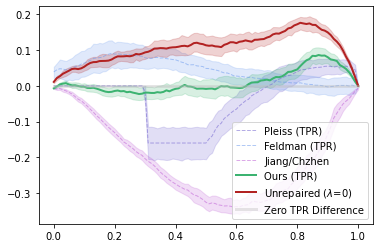

In [510]:
tpr_overthresh = pd.DataFrame()
for alg in ['uncorrected', 'full_corr', 'ours_tpr', 'feldman_tpr']:
    df = algs[alg] 
    if alg == 'feldman_tpr':
        df['thresholds'] 

    if alg in ['pleiss_tpr', 'feldman_tpr']: 
        df = df.rename(columns={name: name[:-11] for name in df.columns})
        df['thresholds'] = feldman_overthresholds['thresholds']

    df['alg'] = alg 

    tpr_overthresh = tpr_overthresh.append(df, ignore_index=True)

algthresh = tpr_overthresh.loc[tpr_overthresh.alg == 'feldman_tpr']
sns.lineplot(x=algthresh['thresholds'], y=algthresh['tpr_differences'], label='Feldman (TPR)', linestyle='--', alpha=0.5, linewidth=1, err_kws={'alpha': 0.20}, color='cornflowerblue')

algthresh = tpr_overthresh.loc[tpr_overthresh.alg == 'full_corr']
sns.lineplot(x=algthresh['thresholds'], y=algthresh['tpr_differences'], label='Jiang/Chzhen', linestyle='--', alpha=0.5, linewidth=1, err_kws={'alpha': 0.20}, color='mediumorchid')

algthresh = tpr_overthresh.loc[tpr_overthresh.alg == 'ours_tpr']
ax = sns.lineplot(x=algthresh['thresholds'], y=algthresh['tpr_differences'], label='Ours (TPR)', linewidth=2, color='mediumseagreen')

algthresh = tpr_overthresh.loc[tpr_overthresh.alg == 'uncorrected']
sns.lineplot(x=algthresh['thresholds'], y=algthresh['tpr_differences'], label='Unrepaired ($\lambda$=0)', linewidth=2, color='firebrick')

sns.lineplot(x=algthresh['thresholds'], y=0*algthresh['thresholds'], linewidth=3,  label='Zero TPR Difference', alpha=0.4, color='silver')

# plt.title('TPR Differences: ' + dataset_to_title[curr_dataset], size=20)
ax.set_ylabel("TPR Differences", fontsize=15)
ax.set(xlabel=None)
ax.set(ylabel=None)

if curr_dataset != 'adult_old':
    ax.legend().remove()

if savefigs:
    plt.savefig('baseline_plots/' + curr_dataset + '__tpr_overthresh.png', bbox_inches='tight')

/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jessica/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

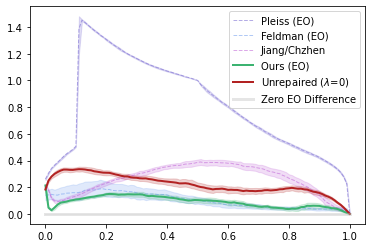

In [514]:
eo_overthresh = pd.DataFrame()
for alg in ['uncorrected', 'full_corr', 'ours_eo', 'pleiss_eo', 'feldman_eo']:
    df = algs[alg]

    if alg in ['pleiss_tpr', 'pleiss_fpr', 'feldman_tpr', 'feldman_acc']: 
        df = df.rename(columns={name: name[:-11] for name in df.columns})
        df['thresholds'] = pleiss_overthresholds['thresholds']
        df['trial'] = pleiss_overthresholds['trial']
    elif alg in ['pleiss_eo', 'feldman_pr', 'feldman_eo']:
        df = df.rename(columns={name: name[:-10] for name in df.columns})
        df['thresholds'] = pleiss_overthresholds['thresholds']
        df['trial'] = pleiss_overthresholds['trial']

    df['alg'] = alg 

    eo_overthresh = eo_overthresh.append(df, ignore_index=True)

eo_overthresh['eqodds_manual'] = np.abs(eo_overthresh.tpr_differences) + np.abs(eo_overthresh.fpr_differences)
# pr_overthresh.head()
# sns.lineplot(data=eo_overthresh, x="thresholds", y="eqodds_manual", hue="alg")

algthresh = eo_overthresh.loc[eo_overthresh.alg == 'pleiss_eo']
sns.lineplot(algthresh['thresholds'], algthresh['eqodds_manual'], label='Pleiss (EO)', linestyle='--', alpha=0.5, linewidth=1, err_kws={'alpha': 0.20}, color='slateblue')

algthresh = eo_overthresh.loc[eo_overthresh.alg == 'feldman_eo']
sns.lineplot(algthresh['thresholds'], algthresh['eqodds_manual'], label='Feldman (EO)', linestyle='--', alpha=0.5, linewidth=1, err_kws={'alpha': 0.20}, color='cornflowerblue')

algthresh = eo_overthresh.loc[tpr_overthresh.alg == 'full_corr']
sns.lineplot(algthresh['thresholds'], algthresh['eqodds_manual'], label='Jiang/Chzhen', linestyle='--', alpha=0.5, linewidth=1, err_kws={'alpha': 0.20}, color='mediumorchid')

algthresh = eo_overthresh.loc[eo_overthresh.alg == 'ours_eo']
ax = sns.lineplot(algthresh['thresholds'], algthresh['eqodds_manual'], label='Ours (EO)', linewidth=2, color='mediumseagreen')

algthresh = eo_overthresh.loc[eo_overthresh.alg == 'uncorrected']
sns.lineplot(algthresh['thresholds'], algthresh['eqodds_manual'], label='Unrepaired ($\lambda$=0)', linewidth=2, color='firebrick')

sns.lineplot(algthresh['thresholds'], 0*algthresh['thresholds'], linewidth=3,  label='Zero EO Difference', alpha=0.4, color='silver')

# plt.title('EqOdds Differences: ' + dataset_to_title[curr_dataset], size=17)
ax.set_ylabel("EqOdds Differences", fontsize=13)
ax.set(xlabel=None)
ax.set(ylabel=None)

if curr_dataset != 'adult_old':
    ax.legend().remove()

if savefigs:
    plt.savefig('baseline_plots/' + curr_dataset + '__eo_overthresh.png', bbox_inches="tight")